In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
import glob

In [10]:
def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [13]:
def basic_avg(df):
    
    df['tstp'] = pd.to_datetime(df['tstp'],format = '%d/%m/%Y %H:%M')
    
    #Separate into train and test
    print('separating into train and test')
    train = df[:33600]
    test = df[33600:]
    y_test = test['energy(kWh/hh)'].to_list()
               
    # groupby (in our case this is the prediction)
    print('Predicting')
    prediction_hh = []
    mean = train["energy(kWh/hh)"].mean()
    prediction_hh.append(mean)
    #Since our test is 4 weeks long, our prediction has to be 4 weeks long
    y_pred = prediction_hh*1488   
        
    #Metrics
    print('Calculating metric')
    rmsle_i = rmsle(y_test,y_pred)
    rmse_i = sqrt(mean_squared_error(y_test, y_pred))
    
    return rmsle_i,rmse_i
    

In [28]:
# Load all the blocks and concatenate them into one database
path = '/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou' # use your path
all_files = glob.glob(path + "/*.csv")

i = 0
rmsle_t = []
rmse_t = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    rmsle_i, rmse_i = basic_avg(df)
    rmsle_t.append(round(rmsle_i,3))
    rmse_t.append(round(rmse_i,3))
    i = i + 1
    print('filename number ' + str(i) + ' of ' + str(len(all_files)))

separating into train and test
Predicting
Calculating metric
filename number 1 of 14
separating into train and test
Predicting
Calculating metric
filename number 2 of 14
separating into train and test
Predicting
Calculating metric
filename number 3 of 14
separating into train and test
Predicting
Calculating metric
filename number 4 of 14
separating into train and test
Predicting
Calculating metric
filename number 5 of 14
separating into train and test
Predicting
Calculating metric
filename number 6 of 14
separating into train and test
Predicting
Calculating metric
filename number 7 of 14
separating into train and test
Predicting
Calculating metric
filename number 8 of 14
separating into train and test
Predicting
Calculating metric
filename number 9 of 14
separating into train and test
Predicting
Calculating metric
filename number 10 of 14
separating into train and test
Predicting
Calculating metric
filename number 11 of 14
separating into train and test
Predicting
Calculating metric
fi

In [29]:
print('RMSLE')
print('Min')
print(min(rmsle_t))
print('Avg')
print(np.average(rmsle_t))
print('Max')
print(max(rmsle_t))

print('RMSE')
print('Min')
print(min(rmse_t))
print('Avg')
print(np.average(rmse_t))
print('Max')
print(max(rmse_t))


RMSLE
Min
0.079
Avg
0.14114285714285715
Max
0.254
RMSE
Min
0.101
Avg
0.20235714285714287
Max
0.394


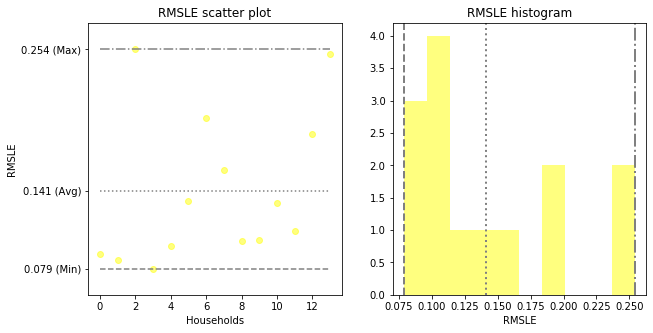

In [56]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.scatter(range(len(rmsle_t)),rmsle_t,color = 'yellow',alpha = 0.5)
plt.plot(range(len(rmsle_t)),[min(rmsle_t)]*len(rmsle_t),color = 'grey',linestyle = '--')
plt.plot(range(len(rmsle_t)),[round(np.average(rmsle_t),3)]*len(rmsle_t),color = 'grey',linestyle = ':')
plt.plot(range(len(rmsle_t)),[max(rmsle_t)]*len(rmsle_t),color = 'grey',linestyle = '-.')
plt.yticks([min(rmsle_t),round(np.average(rmsle_t),3),max(rmsle_t)],[str(min(rmsle_t)) + ' (Min)',
                                                            str(round(np.average(rmsle_t),3)) + ' (Avg)',
                                                                         str(max(rmsle_t))+' (Max)'])
plt.title('RMSLE scatter plot',fontsize = 12)
plt.xlabel('Households')
plt.ylabel('RMSLE')

plt.subplot(122)
plt.hist(rmsle_t,color = 'yellow',alpha = 0.5)
plt.axvline(x=min(rmsle_t), color='grey', linestyle='--', linewidth=2)
plt.axvline(x=round(np.average(rmsle_t),3), color='grey', linestyle=':', linewidth=2)
plt.axvline(x=max(rmsle_t), color='grey', linestyle='-.', linewidth=2)

plt.title("RMSLE histogram",fontsize = 12)
plt.xlabel('RMSLE')
plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots/1_average_model_basic/RMSLE_comfortable_tou')

plt.show();